<a href="https://colab.research.google.com/github/MaximNetolog/index.html-/blob/main/%D0%94%D0%97_%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Когда вы пытаетесь загрузить файл на Google Диск, URL-адрес для просмотра файла не работает напрямую для загрузки через pandas.read_csv(). Вместо этого необходимо использовать URL-адрес uc?id=вместо file/d/и viewв конце ссылки.

Это связано с тем, что просмотр файлов через Google Диск создает интерфейс для отображения фрагмента файла, но не обеспечивает прямую ссылку для загрузки с помощью кода. Поэтому для успешной загрузки файла с Google Диска pandasвам необходимо использовать URL uc?id=вместо file/d/и удалить /viewв конце ссылки, чтобы получить прямую ссылку на файл.

# 1. Загрузите файл HR.csv в pandas dataframe

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as st
import datetime
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pd.options.mode.chained_assignment = None  # default='warn'
# загрузим csv файл по ссылке со столбцами:
df = pd.read_csv('https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1', sep=',', engine='python')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [106]:
df.columns = df.columns.str.lower() # приведем названия столбцов к нижнему регистру

In [107]:
df.info() # Посмотрим общий вид данных и пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [108]:
print('Количество строк с дубликатами:', df.duplicated().sum())
df.duplicated() # проверим df на наличие дубликатов

Количество строк с дубликатами: 3008


0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [109]:
df[df.duplicated()] # посмотрим на строки с дубликатами

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [110]:
def check_duplicated(df_check): # создадим функцию для проверки df на наличие дубликатов в отдельных столбцах
    if df_check.duplicated().all():
        print('Дубликаты во всех столбцах df')
    elif df_check.duplicated().any():
        print('\n','Дубликаты в отдельных столбцах:\n', '')
        duplicates = pd.DataFrame(index=["sum_duplicates"]) # создадим датафрейм для наполнения
        for column in df_check.columns: # перебирая column, найдём столбцы дуболикатов column_duplicated
            if df_check[column].duplicated().any():
                duplicates[column] = df_check.duplicated([column]).sum()
    else:
        print('Нет дубликатов в df')
    return duplicates

In [111]:
check_duplicated(df)


 Дубликаты в отдельных столбцах:
 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
sum_duplicates,14907,14934,14993,14784,14991,14997,14997,14997,14989,14996


Сбор статистики не может происходить одновременно по всем сотрудникам. По этому, данные в колонке time_spend_company, может совпадать для сотрудника, который мог уволился, повыситься или перевестись в другой отдел т.д. Отдел мог быть переименован и тогда все его сотрудники рискуют создать дубликаты при опросе. Необходима проверка на одновременные дубликаты по отдельным комбинациям столбцов:

In [112]:
df_no_department = df.drop('department', axis=1)  # для проверки, cоздадим новый DF, без столбца 'department'
df_no_department[df_no_department.duplicated()]  # поиск дубликатов, без столбца 'department'

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary
236,0.40,0.53,2,151,3,0,1,0,low
330,0.38,0.57,2,140,3,0,1,0,low
380,0.44,0.45,2,156,3,0,1,0,medium
396,0.46,0.57,2,139,3,0,1,0,low
475,0.45,0.57,2,134,3,0,1,0,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low
14995,0.37,0.48,2,160,3,0,1,0,low
14996,0.37,0.53,2,143,3,0,1,0,low
14997,0.11,0.96,6,280,4,0,1,0,low


In [113]:
check_duplicated(df_no_department)


 Дубликаты в отдельных столбцах:
 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary
sum_duplicates,14907,14934,14993,14784,14991,14997,14997,14997,14996


In [114]:
df_no_dep_salary = df.drop(['department', 'salary'], axis=1)  # для проверки, cоздадим новый DF, без столбцов 'department' и 'salary'
df_no_dep_salary[df_no_dep_salary.duplicated()]  # поиск дубликатов, без столбцов 'department' и 'salary'

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
185,0.40,0.46,2,127,3,0,1,0
236,0.40,0.53,2,151,3,0,1,0
271,0.11,0.84,6,251,4,0,1,0
330,0.38,0.57,2,140,3,0,1,0
380,0.44,0.45,2,156,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [115]:
check_duplicated(df_no_dep_salary)


 Дубликаты в отдельных столбцах:
 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
sum_duplicates,14907,14934,14993,14784,14991,14997,14997,14997


In [116]:
df_no_dep_salary_left = df.drop(['department', 'salary', 'left'], axis=1) # сотрудник мог увольняться, исключим столбцы 'department', 'salary', 'left'
df_no_dep_salary_left[df_no_dep_salary_left.duplicated()]  # поиск дубликатов, без столбцов 'department', 'salary', 'left'

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
185,0.40,0.46,2,127,3,0,0
236,0.40,0.53,2,151,3,0,0
271,0.11,0.84,6,251,4,0,0
330,0.38,0.57,2,140,3,0,0
380,0.44,0.45,2,156,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [117]:
check_duplicated(df_no_dep_salary_left)


 Дубликаты в отдельных столбцах:
 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
sum_duplicates,14907,14934,14993,14784,14991,14997,14997


In [118]:
# Сотрудник мог менять отдел с повышением
# Проверим на дубликаты df, за исключением столбца promotion_last_5years
df_no_dep_salary_left_promotion = df.drop(['department', 'salary', 'left', 'promotion_last_5years'], axis=1)
df_no_dep_salary_left_promotion[df_no_dep_salary_left_promotion.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident
185,0.40,0.46,2,127,3,0
236,0.40,0.53,2,151,3,0
271,0.11,0.84,6,251,4,0
330,0.38,0.57,2,140,3,0
380,0.44,0.45,2,156,3,0
...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0
14995,0.37,0.48,2,160,3,0
14996,0.37,0.53,2,143,3,0
14997,0.11,0.96,6,280,4,0


In [119]:
check_duplicated(df_no_dep_salary_left_promotion)


 Дубликаты в отдельных столбцах:
 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident
sum_duplicates,14907,14934,14993,14784,14991,14997


In [120]:
# Возбмём, крайний случай, когда сотрудник получил травму, по этому пепревёлся с повышением в другой отдел.
df_no_dep_salary_left_promotion_accident = df.drop(['department', 'salary', 'left', 'promotion_last_5years', 'work_accident'], axis=1)
df_no_dep_salary_left_promotion_accident[df_no_dep_salary_left_promotion_accident.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
185,0.40,0.46,2,127,3
236,0.40,0.53,2,151,3
271,0.11,0.84,6,251,4
330,0.38,0.57,2,140,3
380,0.44,0.45,2,156,3
...,...,...,...,...,...
14994,0.40,0.57,2,151,3
14995,0.37,0.48,2,160,3
14996,0.37,0.53,2,143,3
14997,0.11,0.96,6,280,4


In [121]:
check_duplicated(df_no_dep_salary_left_promotion_accident)


 Дубликаты в отдельных столбцах:
 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
sum_duplicates,14907,14934,14993,14784,14991


Даже для самых невероятных случаев, нет дубликатов одновременно во всех столбцах, по этому, можно считать, что дубликатов нет и все строки уникальны.

Проверим df на ономальные значения, для этого посмотрим основные статистические характеристики:

In [122]:
df.describe() # Посмотрим основные статистические характеристики. На  min и max для борьбы с выбросами и аномалиями. Ананомалии не только вне min-max

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Отрицательных элементов нет, это означает, что выбросов по min нет. Максимальные значения, также актуальны для своих столбцов, аномалий и выбросов не наблюдаются.

Заметно, что для столбцов: Work_accident, left, promotion_last_5years существуют только бинарные значения, посмотрим их распределение:

<ipython-input-123-020b258f5ff1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="work_accident", palette="Reds")


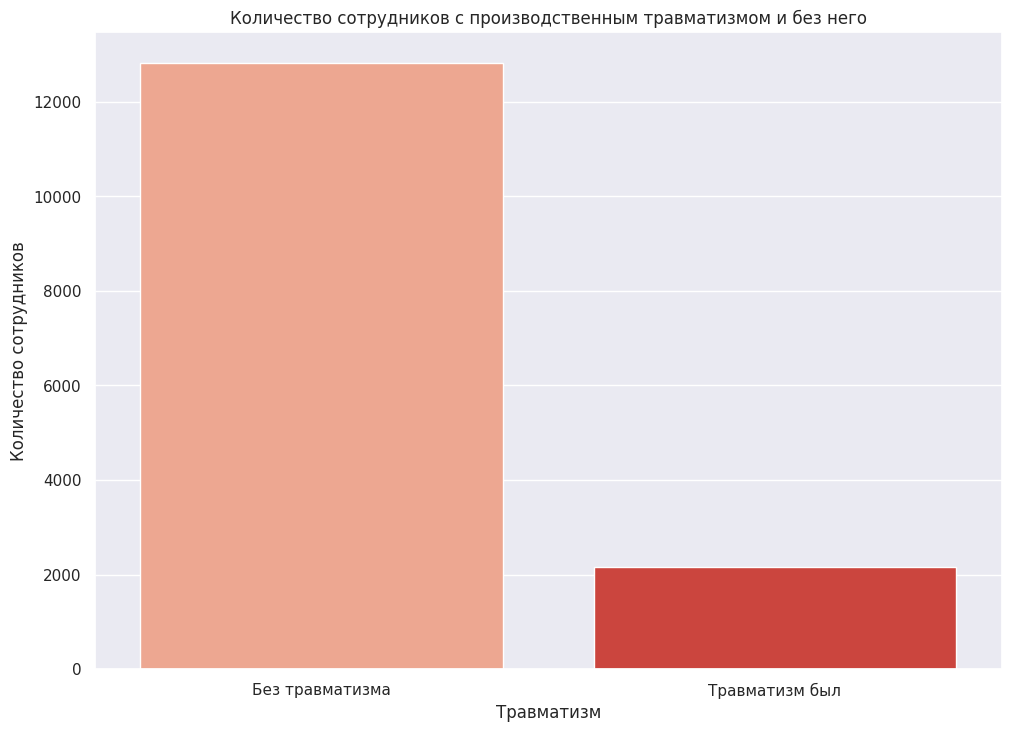

In [123]:
sns.countplot(data=df, x="work_accident", palette="Reds")
plt.title("Количество сотрудников с производственным травматизмом и без него") # название графика
plt.ylabel("Количество сотрудников") # название оси Y
plt.xlabel("Травматизм") # название оси X
plt.xticks([0,1],["Без травматизма","Травматизм был"]) # присваиваем название каждому уникальномузначению по оси X
plt.show()

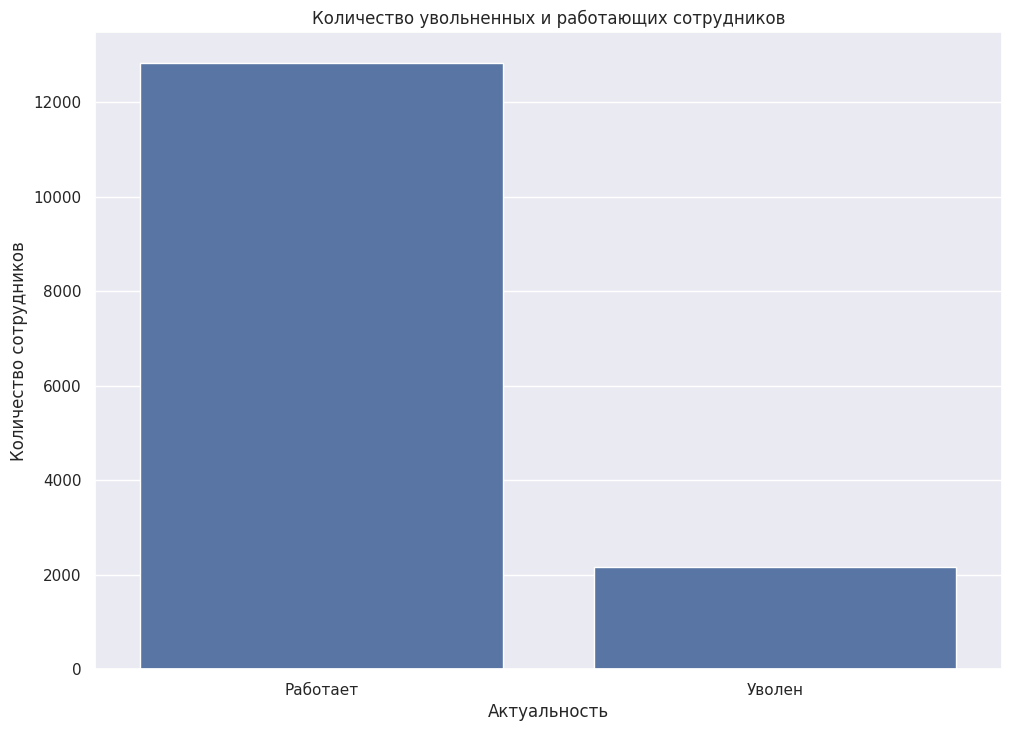

In [124]:
sns.countplot(data=df, x="work_accident")
plt.title("Количество увольненных и работающих сотрудников")
plt.ylabel("Количество сотрудников")
plt.xlabel("Актуальность")
plt.xticks([0,1],["Работает","Уволен"])
plt.show()

<ipython-input-125-b357ef4fe7e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="promotion_last_5years", palette="Greens")


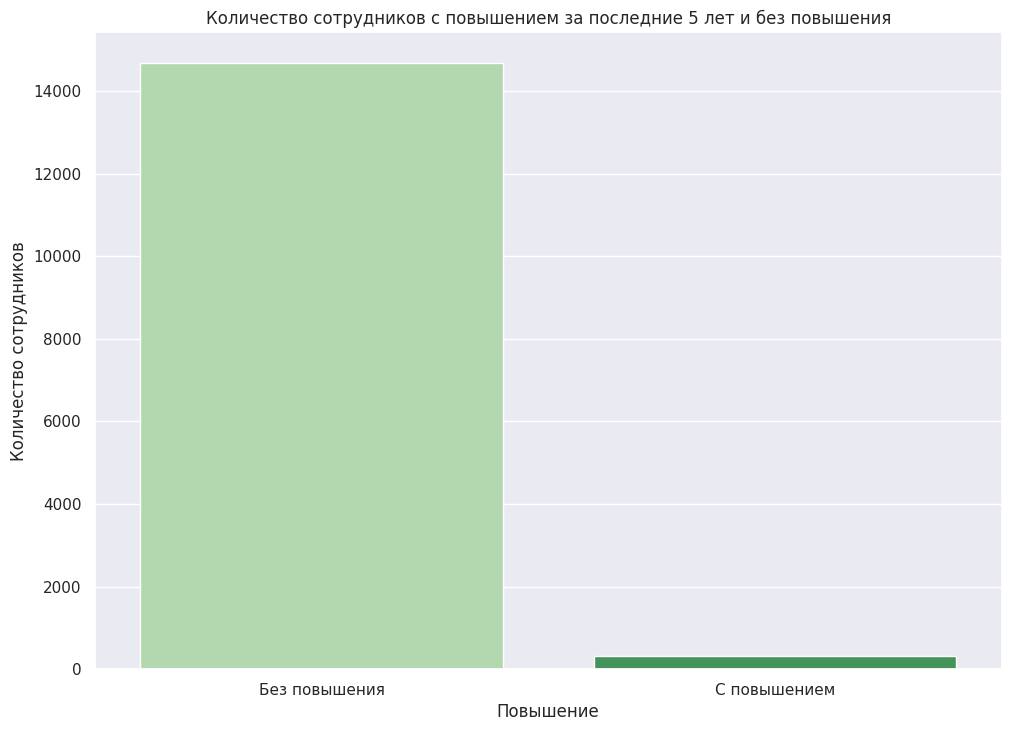

In [125]:
sns.countplot(data=df, x="promotion_last_5years", palette="Greens")
plt.title("Количество сотрудников с повышением за последние 5 лет и без повышения")
plt.ylabel("Количество сотрудников")
plt.xlabel("Повышение")
plt.xticks([0,1],["Без повышения","С повышением"])
plt.show()

In [126]:
# поменяем тип данных с int64 на оbject, в столбцах: work_accident, left, promotion_last_5years с перезаписью в df[]=df[].astype('object')
df['work_accident'] = df['work_accident'].astype('object')
df['left'] = df['left'].astype('object')
df['promotion_last_5years'] = df['promotion_last_5years'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  object 
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  object 
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


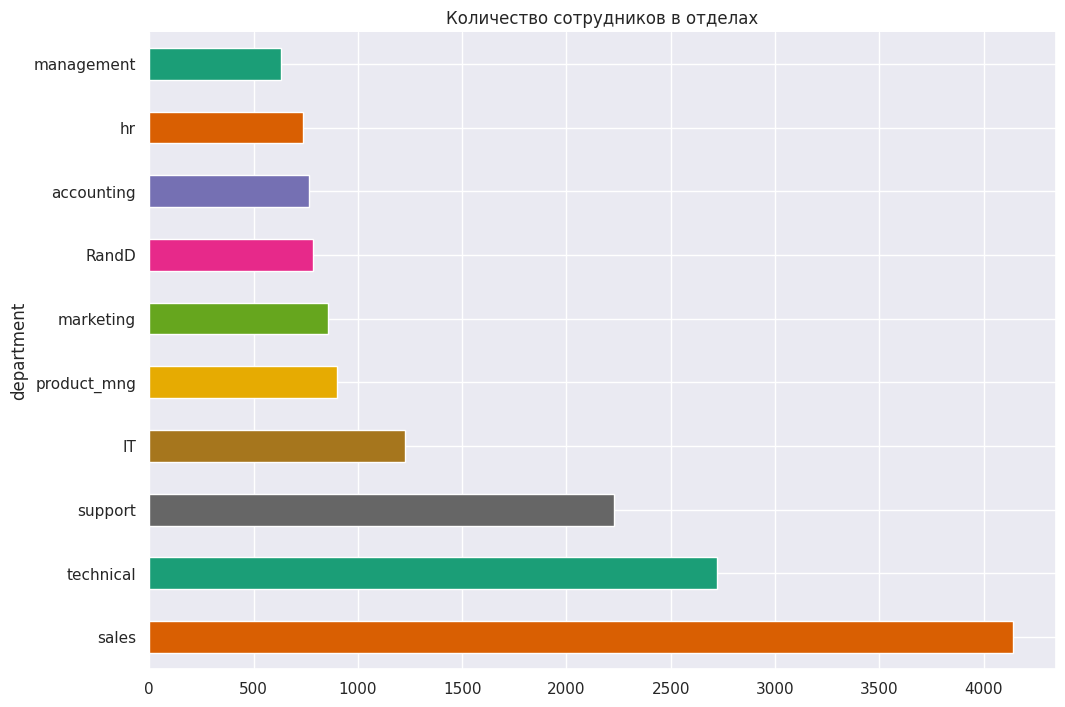

In [127]:
df.groupby('department').size().sort_values().plot(kind='barh', color=sns.color_palette('Dark2')) # .sort_values() - упорядочит по количеству сотрудников
plt.title('Количество сотрудников в отделах')
plt.gca().spines['top'].set_visible(False)
plt.gca().invert_yaxis() # для наглядности, перевернём верх и низ

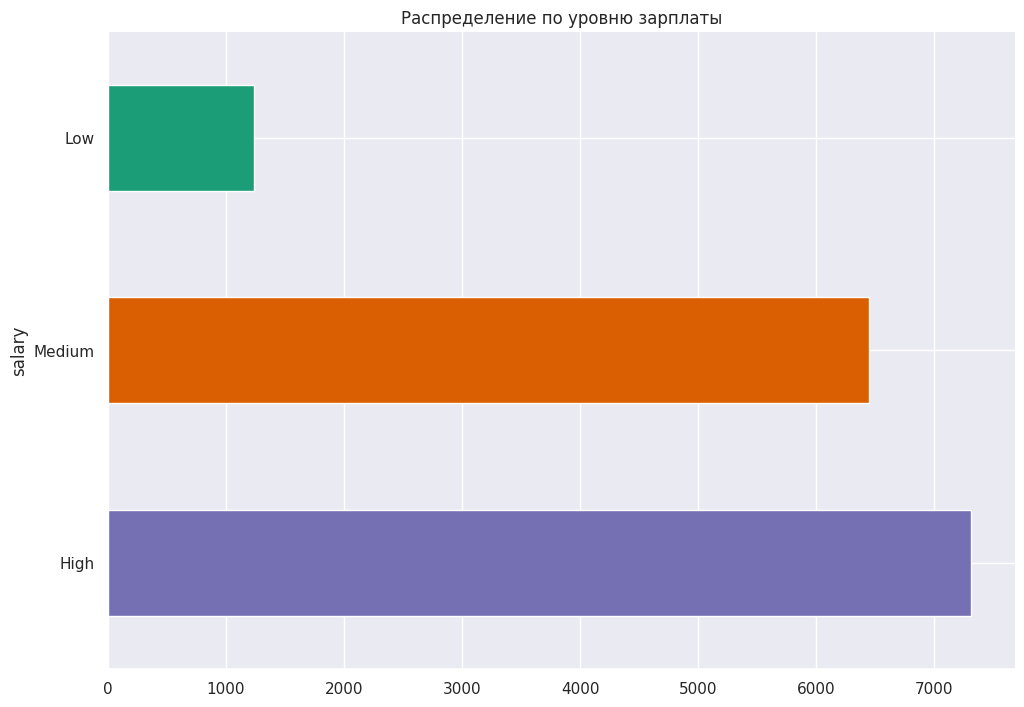

In [128]:
df.groupby('salary').size().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Распределение по уровню зарплаты')
plt.gca().set_yticklabels(['Low', 'Medium', 'High'])
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().invert_yaxis() # для наглядности, перевернём верх и низ

# 2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)

In [129]:
df.describe(include=['object']) # статистика категориальных данных include=['object']

,work_accident,left,promotion_last_5years,department,salary
count,14999,14999,14999,14999,14999
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,12830,11428,14680,4140,7316


In [130]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


# 3. Построим корреляционную матрицу для числовых признаков. Для категориальных признаков, корреляционная матрица не применяется, т.к. корреляция измеряет линейную зависимость между числовыми переменными.

In [131]:
df_num = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']] # Построим матрицу корреляции числовых данных
correlation_matrix = df_num.corr()
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


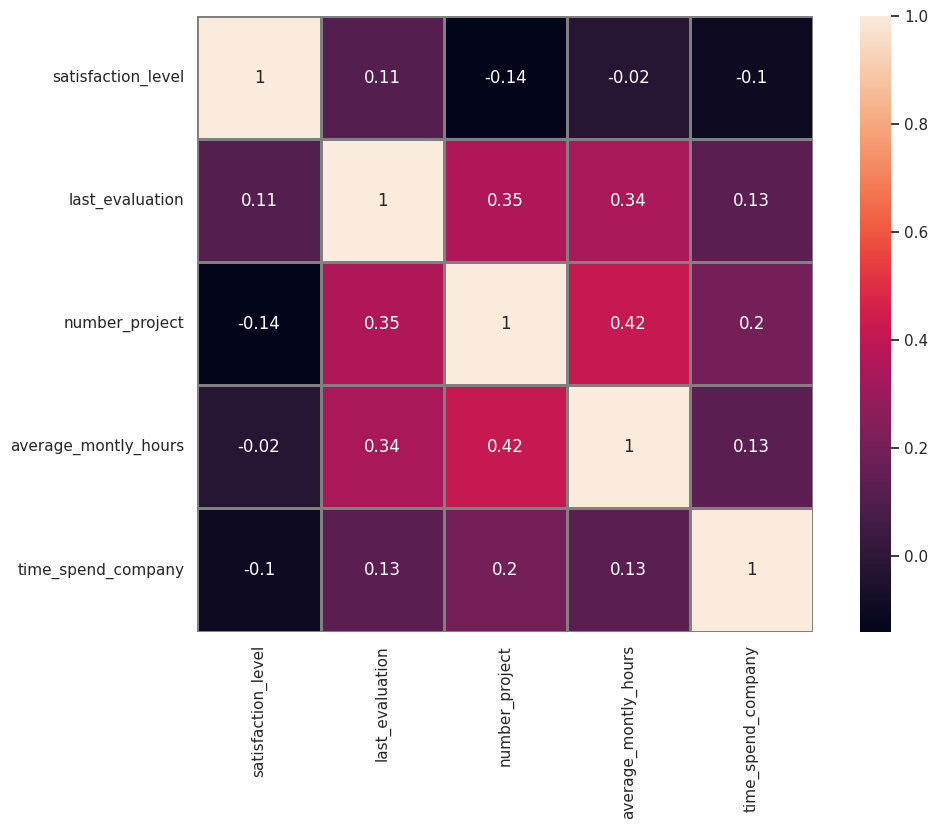

In [132]:
plt.figure(figsize= (12, 8))
sns.heatmap(df_num.corr().round(2), annot = True, square = True, linewidths=1, linecolor='gray'); # покажем матрицу корреляции

In [133]:
correlation_matrix_array = correlation_matrix.abs().to_numpy() # для поиска индексов в матрице, преобразуем DataFrame в массив NumPy

min_corr_index = np.unravel_index(np.argmin(correlation_matrix_array), correlation_matrix_array.shape)
np.fill_diagonal(correlation_matrix_array, 0) # Заменяем единицы по диагонали на нули
max_corr_index = np.unravel_index(np.argmax(correlation_matrix_array), correlation_matrix_array.shape)

feature1_index_min, feature2_index_min = min_corr_index # Индексы для минимальной корреляции

feature1_index_max, feature2_index_max = max_corr_index # Индексы для максимальной корреляции

print(f"Признаки с максимальной корреляцией: \n {df_num.columns[feature1_index_max]},\n {df_num.columns[feature2_index_max]},\n")
print(f"Признаки с минимальной корреляцией: \n {df_num.columns[feature1_index_min]},\n {df_num.columns[feature2_index_min]}")

Признаки с максимальной корреляцией: 
 number_project,
 average_montly_hours,

Признаки с минимальной корреляцией: 
 satisfaction_level,
 average_montly_hours


# 4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [134]:
df_department = pd.DataFrame() # создадим датафрейм для заполненияколичеством работников по отделам
df_department["кол-во работников"] = df.groupby('department').size().sort_values() # .plot(kind='barh', color=sns.color_palette('Dark2')) Сгруппируем df по [department] с подсчетом строк и сортировкой по убыванию с помощью sort_values().
df_department

,кол-во работников
department,
management,630
hr,739
accounting,767
RandD,787
marketing,858
product_mng,902
IT,1227
support,2229
technical,2720


# 5. Показать распределение сотрудников по зарплатам

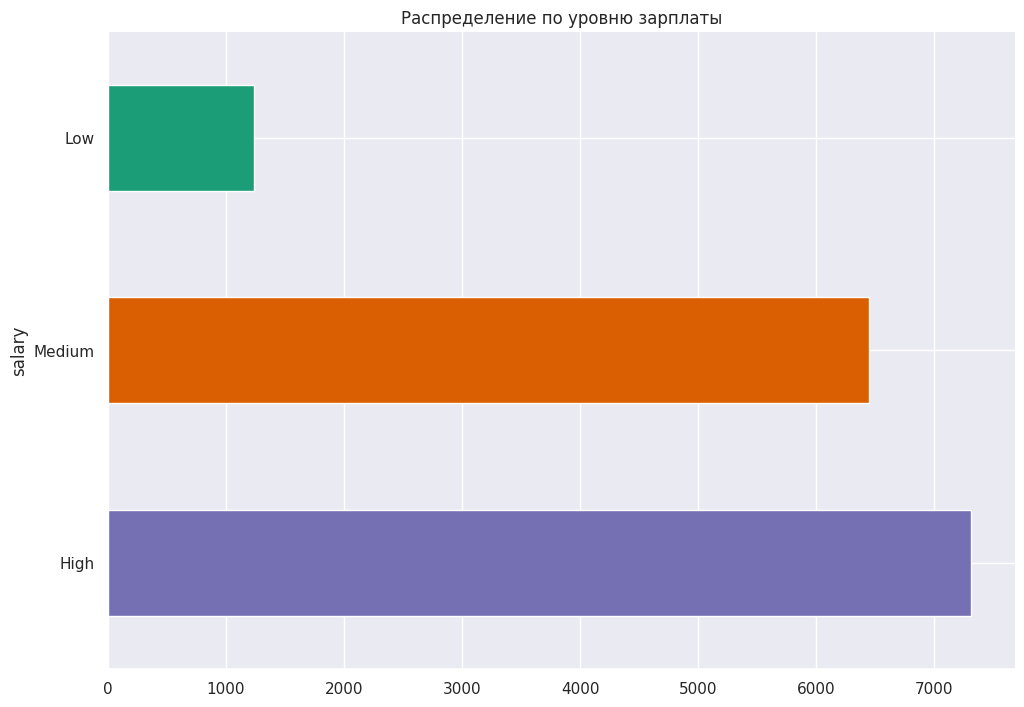

In [135]:
df.groupby('salary').size().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2')) # гистаграмма распределения по ЗП
plt.title('Распределение по уровню зарплаты')
plt.gca().set_yticklabels(['Low', 'Medium', 'High'])
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().invert_yaxis()


# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [136]:
group_dep = df.groupby(['department', 'salary']).size().unstack() # сгруппируем df по department с последующей группировкой по salary,
# где .unstack() - разносит на столбцы сводной таблицы готовые суммы (размеры .size()) для каждой группы department
group_dep

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


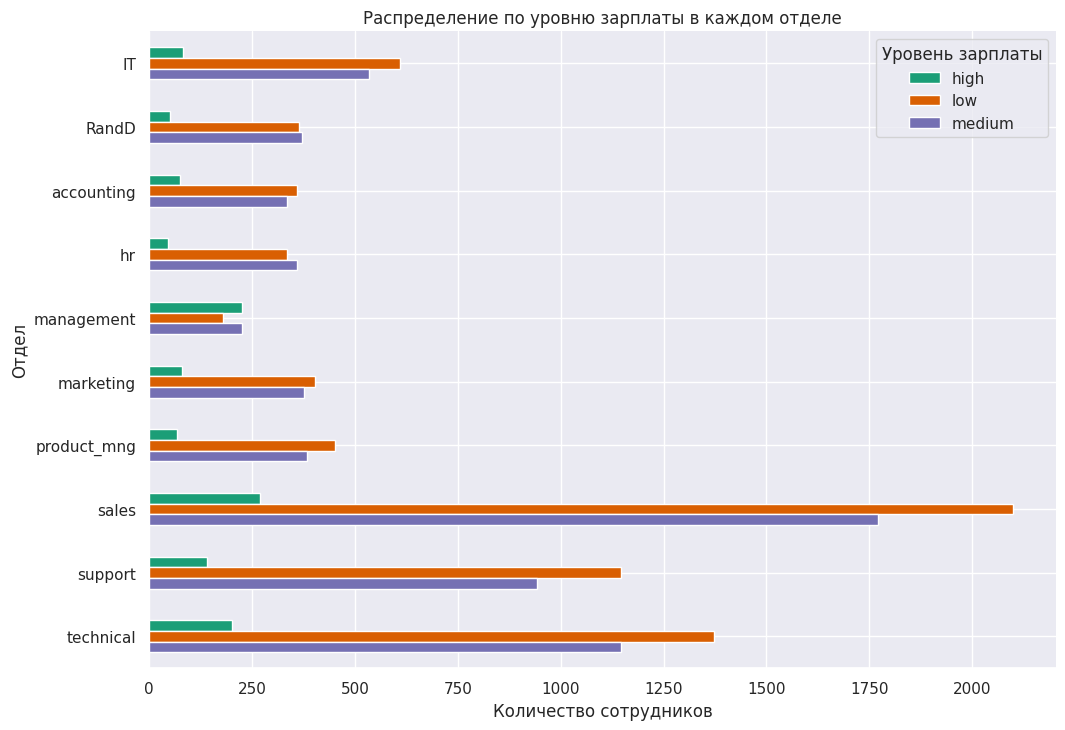

In [137]:
group_dep.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(group_dep.columns))) # где len - кол-во столбцов в датафрейме grouped_df
plt.title('Распределение по уровню зарплаты в каждом отделе')
plt.ylabel('Отдел')
plt.xlabel('Количество сотрудников')
plt.gca().invert_yaxis() # инвертируем ось Х
plt.legend(title='Уровень зарплаты') # легенда датафрейма
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# 7. Выдвиним гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
Для этого создадим из df, новый датафрейм с двумя столбцами: оклад и время работы. Отфильтруем по колонке "оклад" только значения с high и low. Создадим сводную таблицу, перенеся значения времени работы в колонки для каждого класса "оклад" (high и low).

In [138]:
time_sal_h = df[df['salary'] == 'high']['average_montly_hours'].reset_index(drop=True) # отфильтруем по колонке "оклад" только значения с high
time_sal_h = pd.DataFrame(time_sal_h).rename(columns={'average_montly_hours': 'high_salary'}) # переименуем колонку
time_sal_h

,high_salary
0,149
1,289
2,156
3,129
4,149
...,...
1232,148
1233,130
1234,159
1235,131


In [139]:
time_sal_l = df[df['salary'] == 'low']['average_montly_hours'].reset_index(drop=True) # отфильтруем по колонке "оклад" только значения с low
time_sal_l = pd.DataFrame(time_sal_l).rename(columns={'average_montly_hours': 'low_salary'})
time_sal_l

,low_salary
0,157
1,223
2,159
3,153
4,247
...,...
7311,151
7312,160
7313,143
7314,280


In [140]:
time_sal = pd.concat([time_sal_h, time_sal_l], axis = 1) # полностью соединим два датафрейма в один методом concat
time_sal

,high_salary,low_salary
0,149.0,157
1,289.0,223
2,156.0,159
3,129.0,153
4,149.0,247
...,...,...
7311,NaN,151
7312,NaN,160
7313,NaN,143
7314,NaN,280


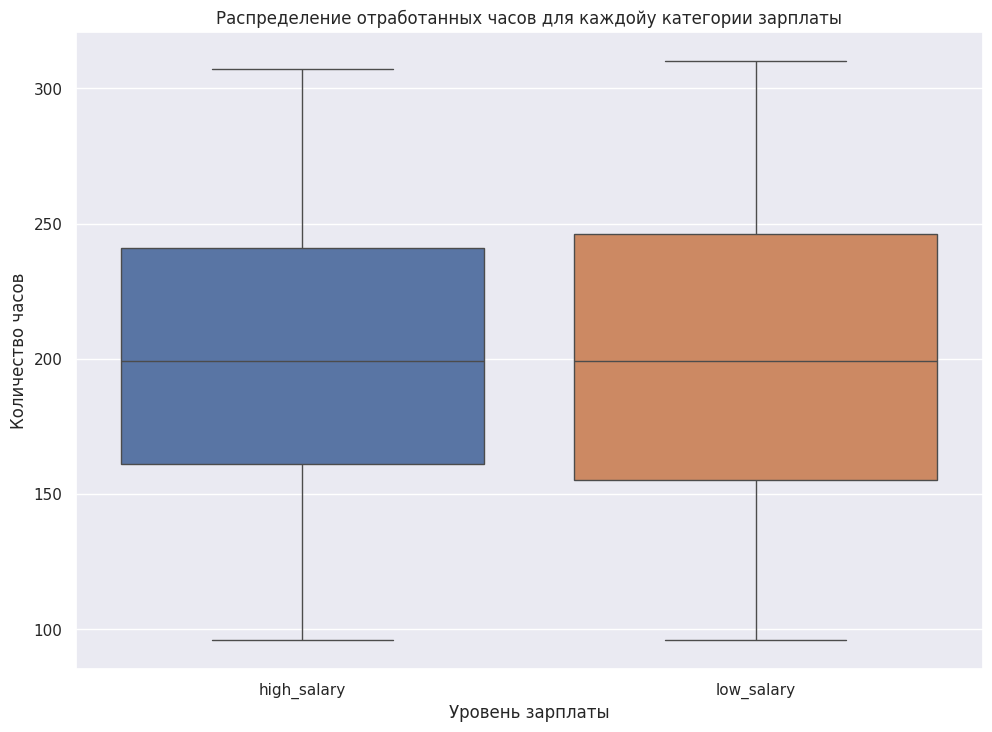

In [141]:
sns.boxplot(data=time_sal) # построим диаграмму размаха
plt.title('Распределение отработанных часов для каждойу категории зарплаты')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество часов')
plt.show()

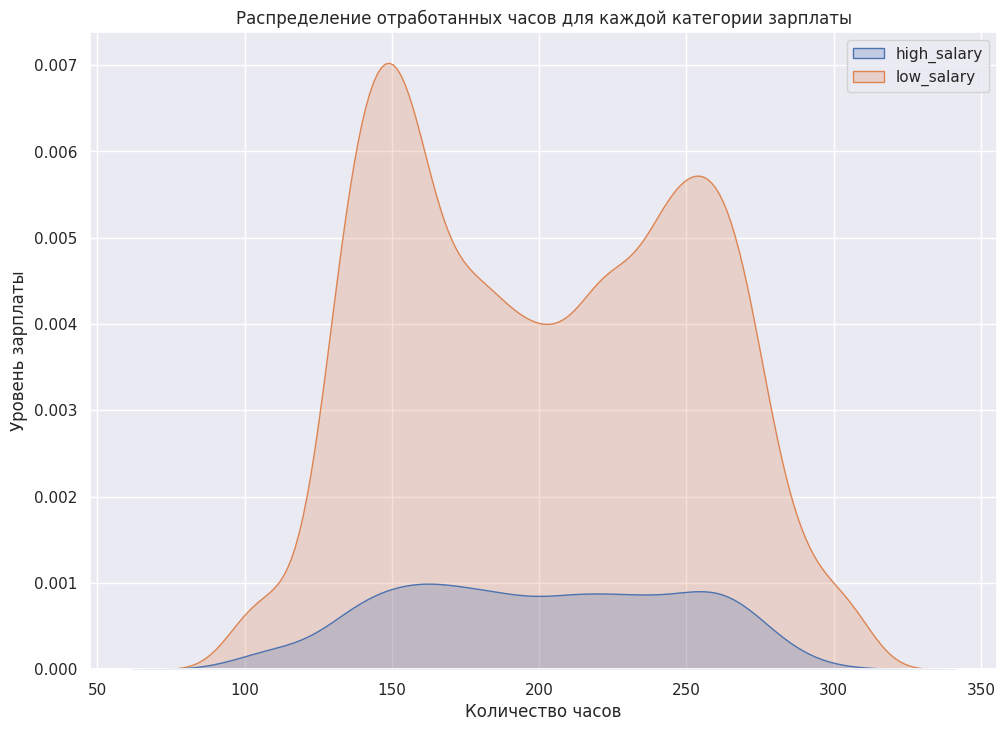

In [142]:
sns.kdeplot(time_sal, fill = True)
plt.title('Распределение отработанных часов для каждой категории зарплаты')
plt.ylabel('Уровень зарплаты')
plt.xlabel('Количество часов')
plt.show()

In [143]:
time_sal.describe() # посчитаем статистические характеристики для каждого уровня зарплаты

,high_salary,low_salary
count,1237.000000,7316.000000
mean,199.867421,200.996583
std,47.710446,50.832214
min,96.000000,96.000000
25%,161.000000,155.000000
50%,199.000000,199.000000
75%,241.000000,246.000000
max,307.000000,310.000000


# На графике ярко выраженное бимодальное распределение low_salary, возможно, произошло наложение данных. Удалим найденные дубликаты и проведём анализ заново.

In [144]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [145]:
df = df.drop_duplicates() # удалим дубликаты в df
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [146]:
df.describe() # Посмотрим основные статистические характеристики. На min и max для борьбы с выбросами и аномалиями. Ананомалии не только вне min-max

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857
std,0.241070,0.168343,1.163238,48.727813,1.330240
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


Отрицательных элементов нет, это означает, что выбросов по min нет. Максимальные значения, также актуальны для своих столбцов, аномалий и выбросов не наблюдаются.

Заметно, что для столбцов: Work_accident, left, promotion_last_5years существуют только бинарные значения, посмотрим их распределение:

<ipython-input-147-020b258f5ff1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="work_accident", palette="Reds")


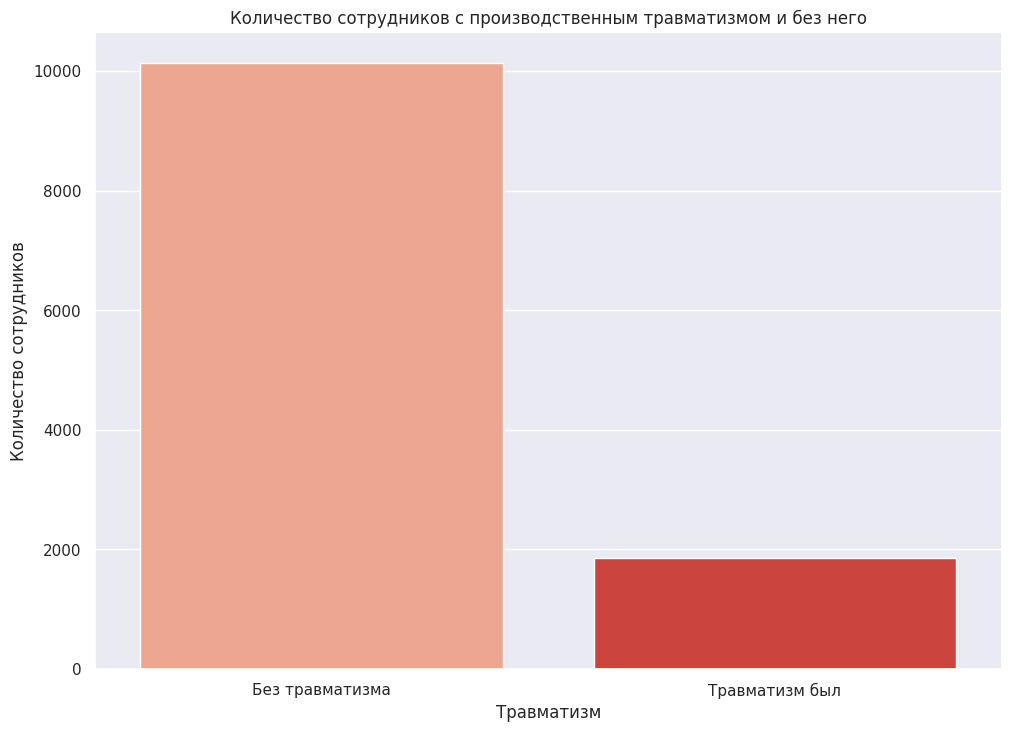

In [147]:
sns.countplot(data=df, x="work_accident", palette="Reds")
plt.title("Количество сотрудников с производственным травматизмом и без него") # название графика
plt.ylabel("Количество сотрудников") # название оси Y
plt.xlabel("Травматизм") # название оси X
plt.xticks([0,1],["Без травматизма","Травматизм был"]) # присваиваем название каждому уникальномузначению по оси X
plt.show()

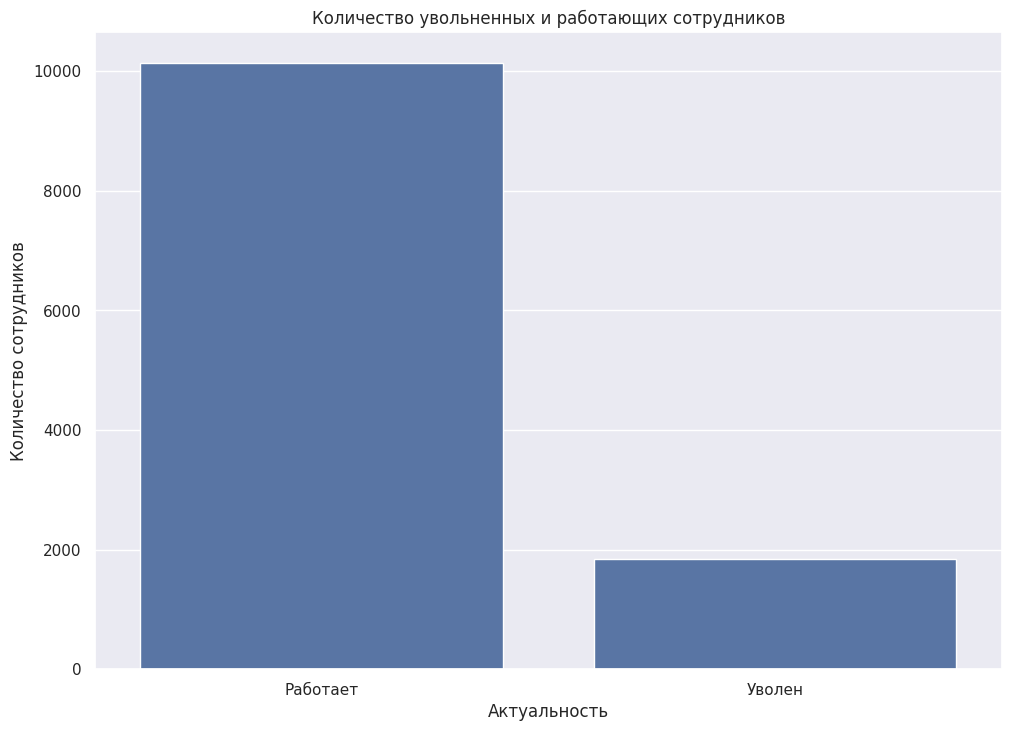

In [148]:
sns.countplot(data=df, x="work_accident")
plt.title("Количество увольненных и работающих сотрудников")
plt.ylabel("Количество сотрудников")
plt.xlabel("Актуальность")
plt.xticks([0,1],["Работает","Уволен"])
plt.show()

<ipython-input-149-b357ef4fe7e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="promotion_last_5years", palette="Greens")


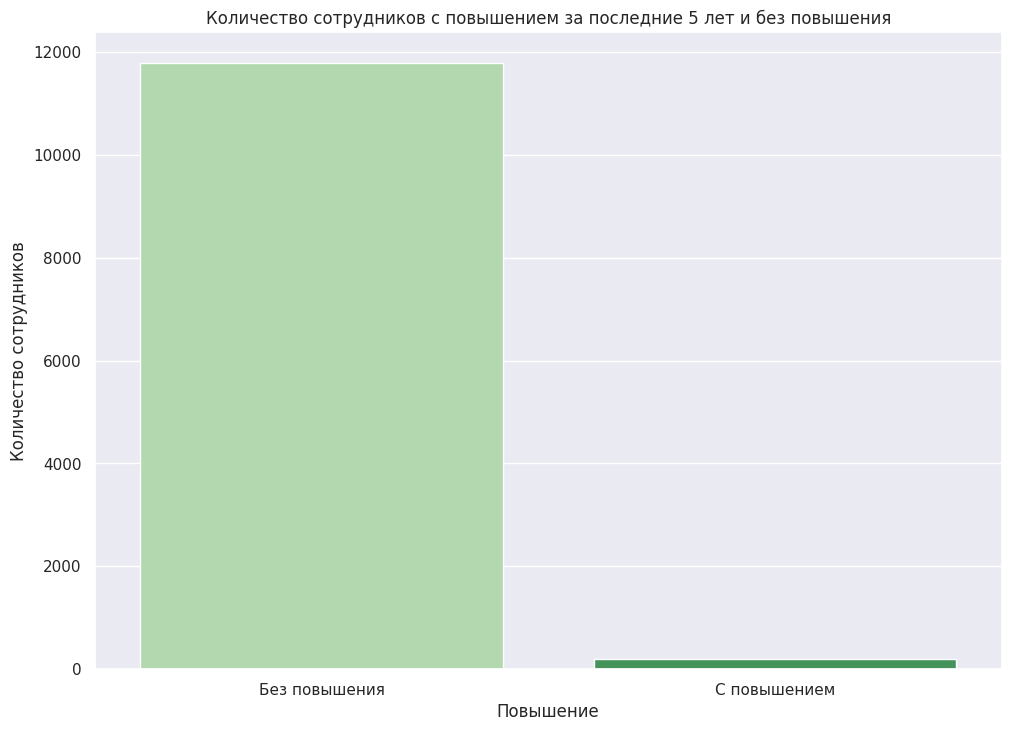

In [149]:
sns.countplot(data=df, x="promotion_last_5years", palette="Greens")
plt.title("Количество сотрудников с повышением за последние 5 лет и без повышения")
plt.ylabel("Количество сотрудников")
plt.xlabel("Повышение")
plt.xticks([0,1],["Без повышения","С повышением"])
plt.show()

In [150]:
# поменяем тип данных с int64 на оbject, в столбцах: work_accident, left, promotion_last_5years с перезаписью в df[]=df[].astype('object')
df['work_accident'] = df['work_accident'].astype('object')
df['left'] = df['left'].astype('object')
df['promotion_last_5years'] = df['promotion_last_5years'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  object 
 6   left                   11991 non-null  object 
 7   promotion_last_5years  11991 non-null  object 
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.3+ MB


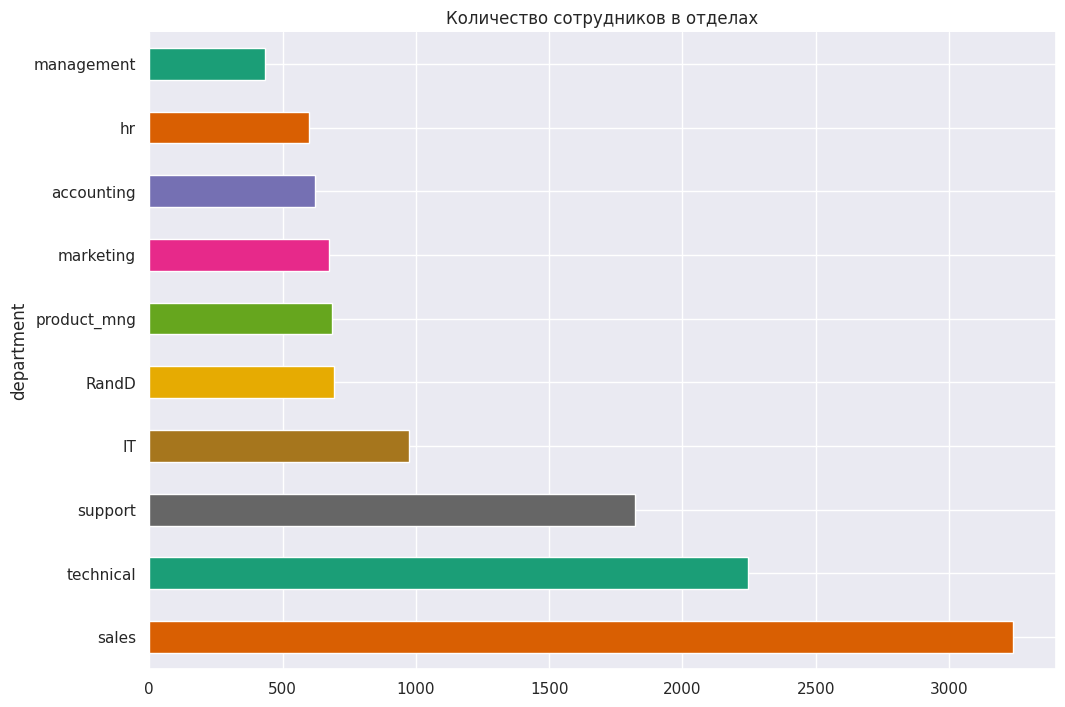

In [151]:
df.groupby('department').size().sort_values().plot(kind='barh', color=sns.color_palette('Dark2')) # .sort_values() - упорядочит по количеству сотрудников
plt.title('Количество сотрудников в отделах')
plt.gca().spines['top'].set_visible(False)
plt.gca().invert_yaxis() # для наглядности, перевернём верх и низ

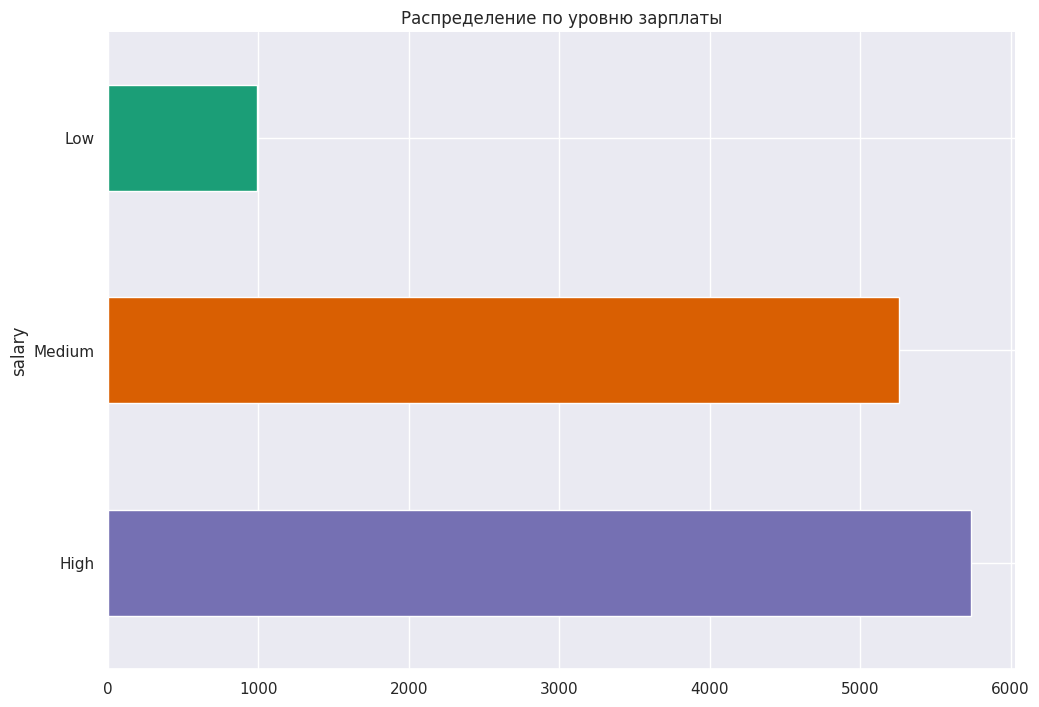

In [152]:
df.groupby('salary').size().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Распределение по уровню зарплаты')
plt.gca().set_yticklabels(['Low', 'Medium', 'High'])
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().invert_yaxis() # для наглядности, перевернём верх и низ

# 2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)

In [153]:
df.describe(include=['object']) # статистика категориальных данных include=['object']

,work_accident,left,promotion_last_5years,department,salary
count,11991,11991,11991,11991,11991
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,10141,10000,11788,3239,5740


In [154]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857
std,0.241070,0.168343,1.163238,48.727813,1.330240
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


# 3. Построим корреляционную матрицу для числовых признаков. Для категориальных признаков, корреляционная матрица не применяется, т.к. корреляция измеряет линейную зависимость между числовыми переменными.

In [155]:
df_num = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']] # Построим матрицу корреляции числовых данных
correlation_matrix = df_num.corr()
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000


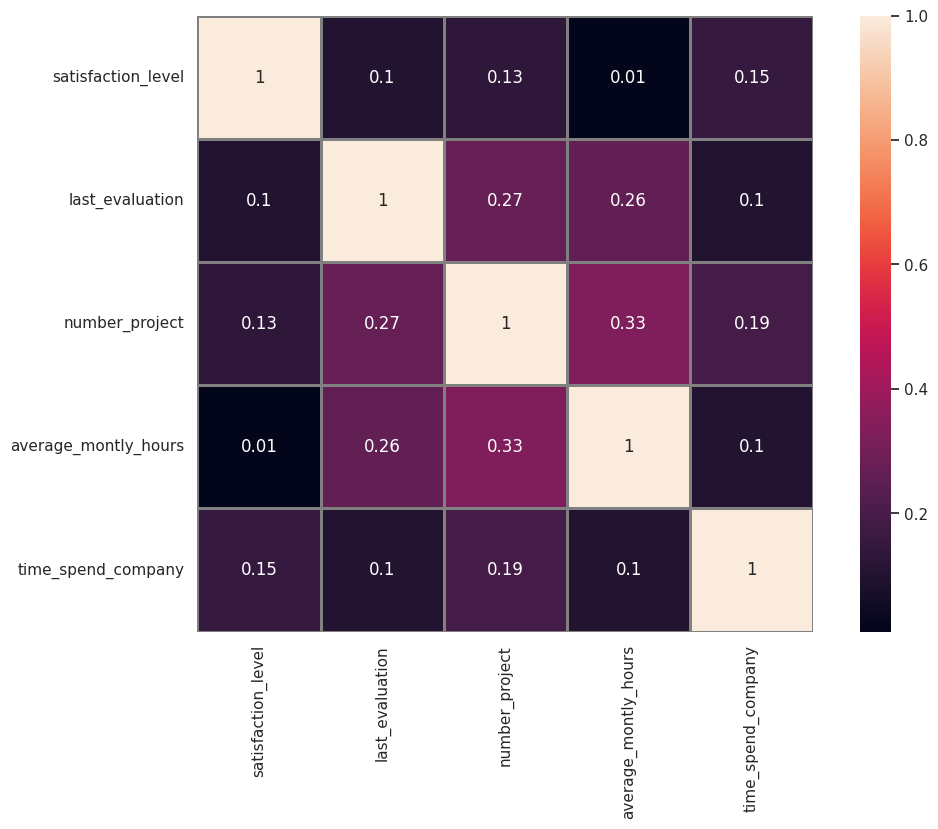

In [156]:
plt.figure(figsize= (12, 8))
sns.heatmap(df_num.corr().abs().round(2), annot = True, square = True, linewidths=1, linecolor='gray'); # покажем матрицу корреляции

In [157]:
correlation_matrix_array = correlation_matrix.abs().to_numpy() # для поиска индексов в матрице, преобразуем DataFrame в массив NumPy

min_corr_index = np.unravel_index(np.argmin(correlation_matrix_array), correlation_matrix_array.shape)
np.fill_diagonal(correlation_matrix_array, 0) # Заменяем единицы по диагонали на нули
max_corr_index = np.unravel_index(np.argmax(correlation_matrix_array), correlation_matrix_array.shape)

feature1_index_min, feature2_index_min = min_corr_index # Индексы для минимальной корреляции

feature1_index_max, feature2_index_max = max_corr_index # Индексы для максимальной корреляции

print(f"Признаки с максимальной корреляцией: \n {df_num.columns[feature1_index_max]},\n {df_num.columns[feature2_index_max]},\n")
print(f"Признаки с минимальной корреляцией: \n {df_num.columns[feature1_index_min]},\n {df_num.columns[feature2_index_min]}")

Признаки с максимальной корреляцией: 
 number_project,
 average_montly_hours,

Признаки с минимальной корреляцией: 
 satisfaction_level,
 average_montly_hours


# 4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [158]:
df_department = pd.DataFrame() # создадим датафрейм для заполненияколичеством работников по отделам
df_department["кол-во работников"] = df.groupby('department').size().sort_values() # .plot(kind='barh', color=sns.color_palette('Dark2')) Сгруппируем df по [department] с подсчетом строк и сортировкой по убыванию с помощью sort_values().
df_department

,кол-во работников
department,
management,436
hr,601
accounting,621
marketing,673
product_mng,686
RandD,694
IT,976
support,1821
technical,2244


# 5. Показать распределение сотрудников по зарплатам

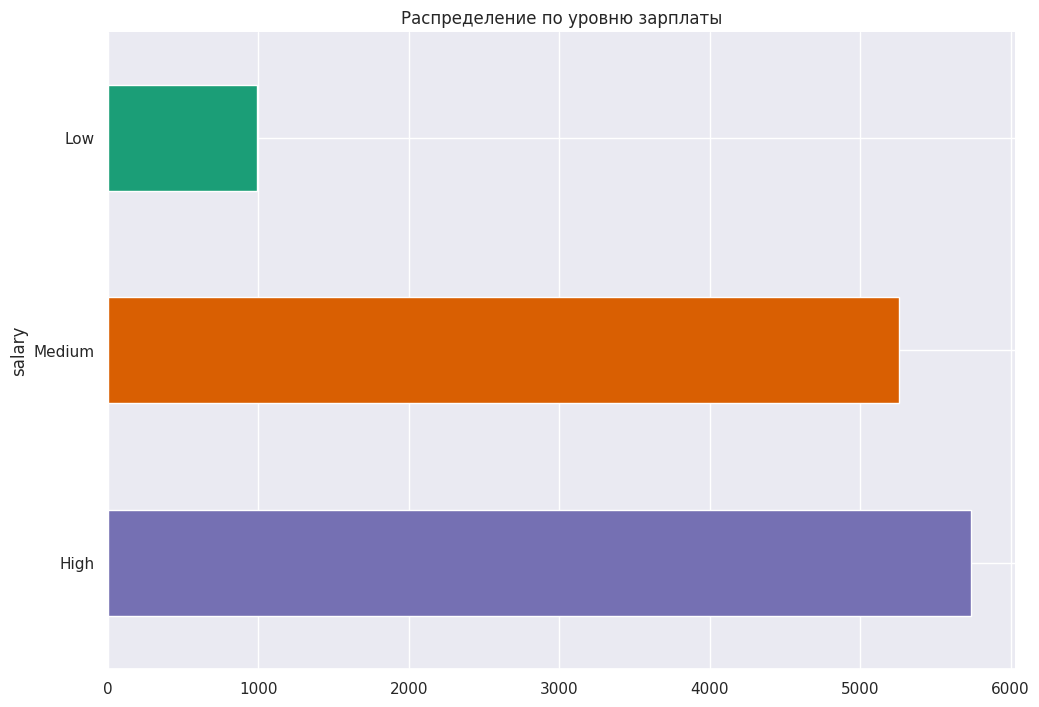

In [159]:
df.groupby('salary').size().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2')) # гистаграмма распределения по ЗП
plt.title('Распределение по уровню зарплаты')
plt.gca().set_yticklabels(['Low', 'Medium', 'High'])
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().invert_yaxis()


# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [160]:
group_dep = df.groupby(['department', 'salary']).size().unstack() # сгруппируем df по department с последующей группировкой по salary,
# где .unstack() - разносит на столбцы сводной таблицы готовые суммы (размеры .size()) для каждой группы department
group_dep

salary,high,low,medium
department,,,
IT,71,476,429
RandD,47,322,325
accounting,63,296,262
hr,38,296,267
management,128,139,169
marketing,62,310,301
product_mng,52,343,291
sales,237,1553,1449
support,126,867,828


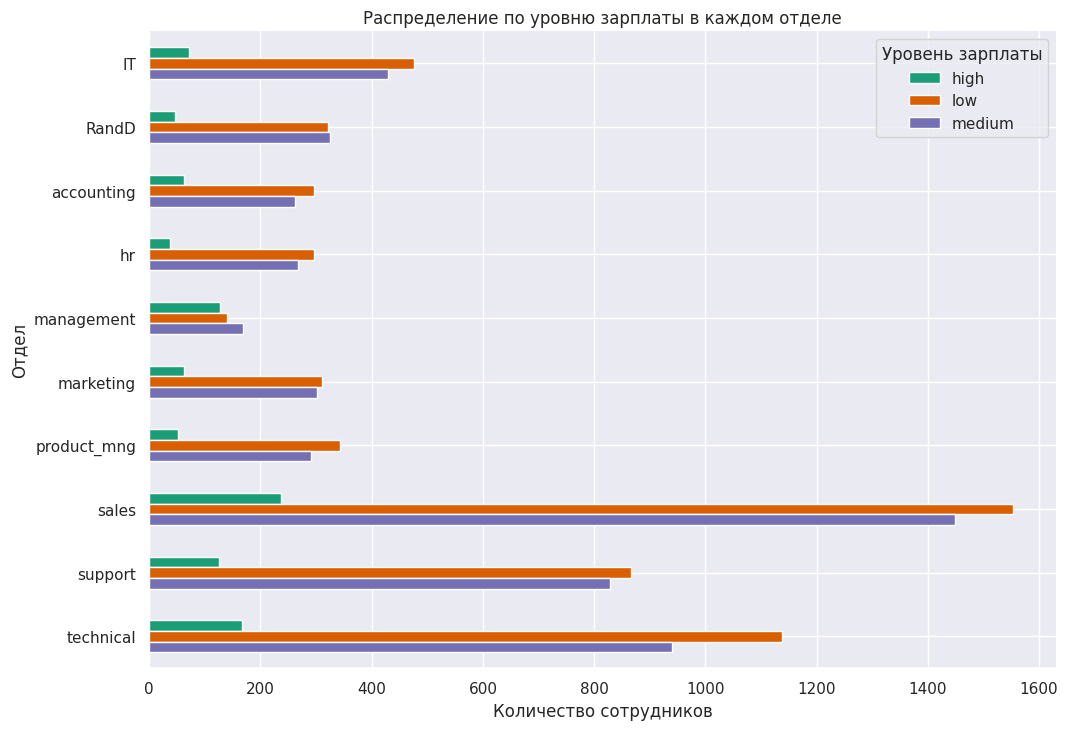

In [161]:
group_dep.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(group_dep.columns))) # где len - кол-во столбцов в датафрейме grouped_df
plt.title('Распределение по уровню зарплаты в каждом отделе')
plt.ylabel('Отдел')
plt.xlabel('Количество сотрудников')
plt.gca().invert_yaxis() # инвертируем ось Х
plt.legend(title='Уровень зарплаты') # легенда датафрейма
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# 7. Выдвиним гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
Для этого создадим из df, новый датафрейм с двумя столбцами: оклад и время работы. Отфильтруем по колонке "оклад" только значения с high и low. Создадим сводную таблицу, перенеся значения времени работы в колонки для каждого класса "оклад" (high и low).

In [162]:
time_sal_h = df[df['salary'] == 'high']['average_montly_hours'].reset_index(drop=True) # отфильтруем по колонке "salary" только значения с high
time_sal_h = pd.DataFrame(time_sal_h).rename(columns={'average_montly_hours': 'high_salary'}) # переименуем колонку
time_sal_h

,high_salary
0,149
1,289
2,156
3,129
4,149
...,...
985,193
986,259
987,266
988,185


In [163]:
time_sal_l = df[df['salary'] == 'low']['average_montly_hours'].reset_index(drop=True) # отфильтруем по колонке "salary" только значения с low
time_sal_l = pd.DataFrame(time_sal_l).rename(columns={'average_montly_hours': 'low_salary'})
time_sal_l

,low_salary
0,157
1,223
2,159
3,153
4,247
...,...
5735,148
5736,146
5737,242
5738,255


In [164]:
time_sal = pd.concat([time_sal_h, time_sal_l], axis = 1) # полностью соединим два датафрейма в один методом concat
time_sal

,high_salary,low_salary
0,149.0,157
1,289.0,223
2,156.0,159
3,129.0,153
4,149.0,247
...,...,...
5735,NaN,148
5736,NaN,146
5737,NaN,242
5738,NaN,255


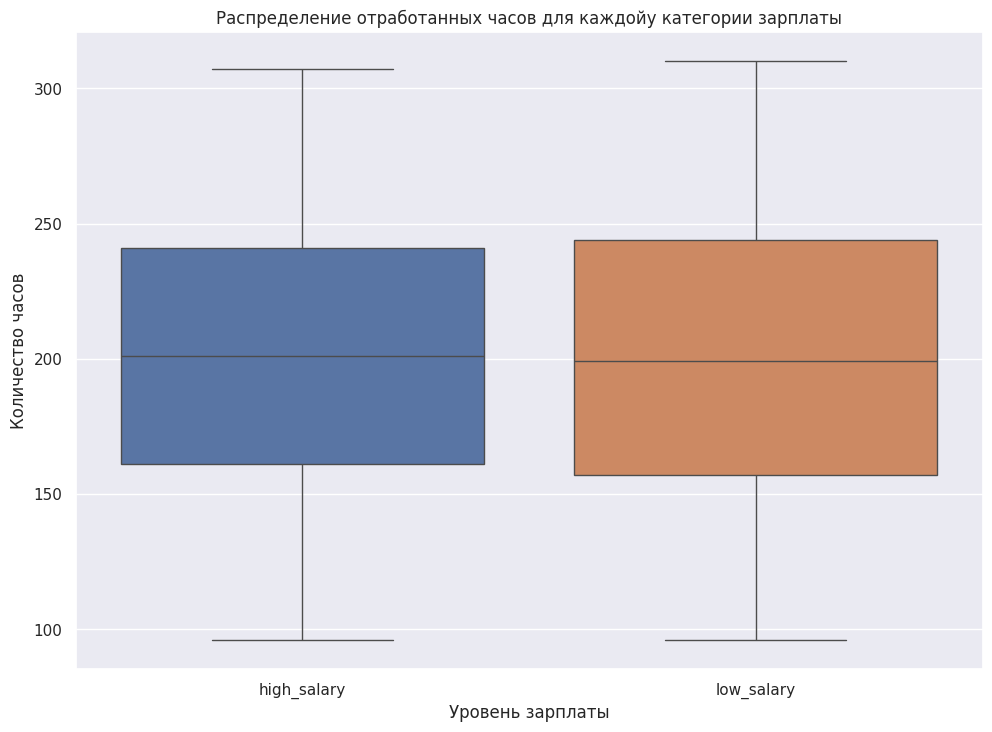

In [165]:
sns.boxplot(data=time_sal) # построим диаграмму размаха
plt.title('Распределение отработанных часов для каждойу категории зарплаты')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество часов')
plt.show()

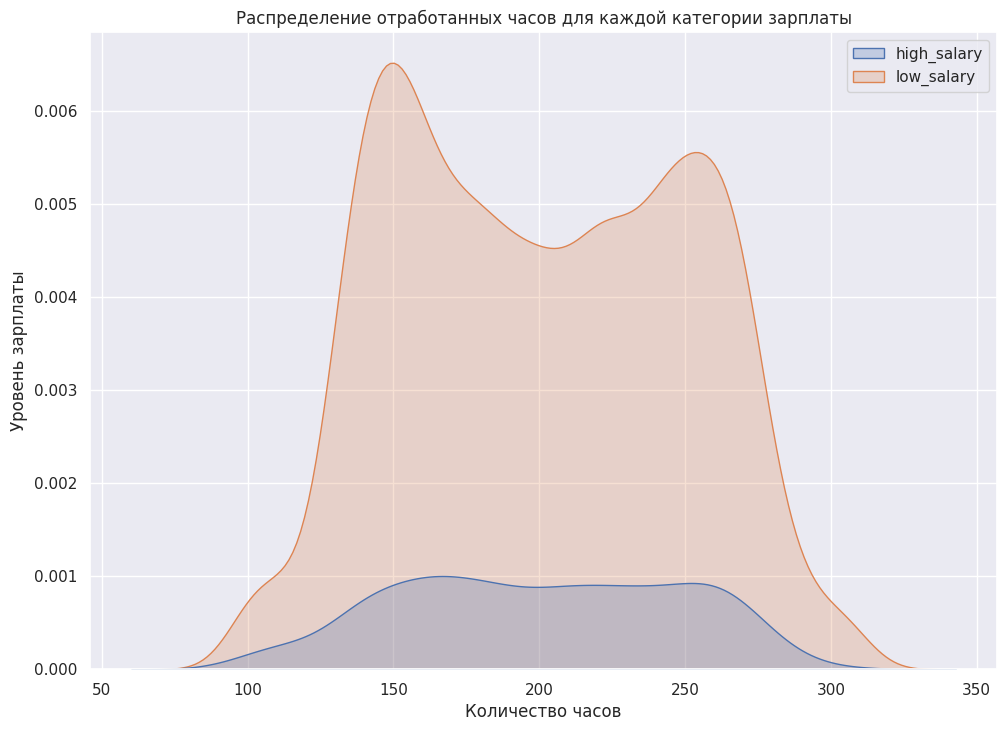

In [166]:
sns.kdeplot(time_sal, fill = True)
plt.title('Распределение отработанных часов для каждой категории зарплаты')
plt.ylabel('Уровень зарплаты')
plt.xlabel('Количество часов')
plt.show()

In [167]:
time_sal.describe() # посчитаем статистические характеристики для каждого уровня зарплаты

,high_salary,low_salary
count,990.000000,5740.000000
mean,200.067677,200.439199
std,47.477252,49.271065
min,96.000000,96.000000
25%,161.250000,157.000000
50%,201.000000,199.000000
75%,241.000000,244.000000
max,307.000000,310.000000


Статистические параметры изменились, но среднее время работы сотрудников с низкой зарплатой ниже, чем для сотрудников с высокой. На графике видно, что ярко выраженное бимодальное распределение low_salary сгладилось.

In [168]:
data_1 = time_sal['high_salary']
data_2 = time_sal['low_salary']

In [169]:
stat, p = st.shapiro(data_1) # проверяем нормальность распределения data_1 с помощью теста Шапиро-Уилка
print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно ненормальное распределение')

stat = nan, p = 1.00000
Вероятно нормальное распределение


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Stat = nan означает, что значение статистики теста Шапиро-Уилка не определено. Это может произойти, например, если размер выборки слишком мал. В данном случае, поскольку p-значение равно 1, мы можем считать, что данные выборки действительно имеют нормальное распределение.

In [170]:
stat, p = st.shapiro(data_2) # проверяем нормальность распределения data_1 с помощью теста Шапиро-Уилка
print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно нормальное распределение')
else:
    print('Вероятно не нормальное распределение')

stat = 0.968, p = 0.00000
Вероятно не нормальное распределение


In [171]:
data_1 = time_sal['high_salary']
data_2 = time_sal['low_salary']

Распределение ненормальное, значения непрерывные, поэтому будем использовать критерий Манна-Уитни.

In [172]:
stat, p = st.mannwhitneyu(data_1, data_2) # критерием Манна-Уитни, проверяем распределения data_1 и data_2 на одинаковость
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
    print('Распределения, вероятно, одинаковые') # пивелью больше 0.05, значит, распределения одинаковы
else:
    print('Распределения, вероятно, различаются')

Статистика = nan, p = nan
Распределения, вероятно, различаются


Статистика = nan и p = nan означают, что значение статистики критерия Манна-Уитни не определено, а вероятность того, что нулевая гипотеза верна, не может быть рассчитана. А так же подтверждается, что распределения data_1 и data_2, различаются.

#8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [173]:
df = pd.read_csv('https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1', sep=',', engine='python')
df.to_csv('df.csv', index=False) # запишем df в csv файл

In [174]:
fired = df[df['left'] == 1] # создадим датафрейм, где содержатся только уволившиеся сотрудники
working = df[df['left'] == 0] # создадим датафрейм, где содержатся только работающие сотрудники
working_promotion_last_5years = working[working['promotion_last_5years'] == 1].shape[0]/df[df['promotion_last_5years'] == 1].shape[0] #  для сотрудников с повышением, где shape[0] - кол-во строк
fired_promotion_last_5years = fired[fired['promotion_last_5years'] == 1].shape[0]/df[df['promotion_last_5years'] == 1].shape[0] #  для сотрудников с повышением, где shape[0] - кол-во строк

In [175]:
print('Доля сотрудников с повышением за последние 5 лет из числа \n уволившихся: ', fired_promotion_last_5years)
print('Доля сотрудников с повышением за последние 5 лет из числа \n работающих: ', working_promotion_last_5years)

Доля сотрудников с повышением за последние 5 лет из числа 
 уволившихся:  0.05956112852664577
Доля сотрудников с повышением за последние 5 лет из числа 
 работающих:  0.9404388714733543


In [176]:
fired_satisfaction_level = fired['satisfaction_level'].mean() # посчитаем среднюю степень удовлетворенности
working_satisfaction_level = working['satisfaction_level'].mean()
print('Средняя степень удовлетворенности уволившихся сотрудников: ', fired_satisfaction_level)
print('Средняя степень удовлетворенности работающих сотрудников: ', working_satisfaction_level)


Средняя степень удовлетворенности уволившихся сотрудников:  0.4400980117614114
Средняя степень удовлетворенности работающих сотрудников:  0.666809590479524


In [177]:
fired_time_spend_company = fired['number_project'].mean() # посчитаем среднее количество проектов
working_time_spend_company = working['number_project'].mean()
print('Среднее количество проектов уволившихся сотрудников: ', fired_time_spend_company)
print('Среднее количество проектов работающих сотрудников: ', working_time_spend_company)

Среднее количество проектов уволившихся сотрудников:  3.8555026603192384
Среднее количество проектов работающих сотрудников:  3.786664333216661


# 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [237]:
lda = df.drop(['department', 'salary'], axis=1) # удалим столбцы department и salary
lda

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [238]:
X = lda.drop('left', axis=1) # исключив признак "уволился / работает", создадим матрицу признаков для обучения модели
y = lda['left'] # выделим целевую переменную "уволился / работает", которую будем предсказывать
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # разделим данные на обучающую и тестовую выборки
lda = LinearDiscriminantAnalysis() # создадим обучающую модель
lda.fit(X_train, y_train) # обучим модель
y_pred = lda.predict(X_test) # предскажем на тестовой выборке

print('Точность модели: ', accuracy_score(y_test, y_pred))
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred)) # запишем матрицу ошибок в датафрейм
print('Матрица ошибок: ')
df_confusion_matrix

Точность модели:  0.7533333333333333
Матрица ошибок: 


,0,1
0,2094,200
1,540,166


In [242]:
df_classification_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)) # запишем в датафрейм матрицу точности предсказания по классам
print('Матрица точности предсказания (precision) и полноты (recall) по классам: ')
df_classification_report.round(2)

Матрица точности предсказания (precision) и полноты (recall) по классам: 


,0,1,accuracy,macro avg,weighted avg
precision,0.79,0.45,0.75,0.62,0.71
recall,0.91,0.24,0.75,0.57,0.75
f1-score,0.85,0.31,0.75,0.58,0.72
support,2294.00,706.00,0.75,3000.00,3000.00


Исходя из результатов, можно сделать следующие выводы:

Точность модели: 75%. Модель правильно классифицировала 75% случайев, когда сотрудник остался или уволился.

Матрица ошибок:

Верно предсказанных случаев, когда сотрудник не уволился (класс 0) - 2094
Неверно предсказанных случаев, когда сотрудник уволился, но модель предсказала, что он останется (ложно отрицательных) - 200
Верно предсказанных случаев, когда сотрудник уволился (класс 1) - 166
Неверно предсказанных случаев, когда сотрудник остался, но модель предсказала, что он уволится (ложно положительных) - 540


Отчет о классификации:

Точность для класса 0 (сотрудник остается) составляет 79%. Это означает, что из всех случаев, предсказания, что сотрудник остается, 79% были правильными, а точность для класса 1 (сотрудник увольняется), только 45% были правильными.

Полнота для класса 0 составляет 91%. Это означает, что для реальных случаев, когда сотрудник остался, модель правильно предсказала 91%, а для класса 1 (увольняется), правильно предсказала только 24%.

Общий вывод: Модель имеет неплохую точность в предсказании случаев, когда сотрудник остается, однако ее точность в предсказании увольнения сотрудника довольно низкая. Полнота также низкая для класса увольнения, что означает, что модель пропускает множество случаев увольнения. Требуется дополнительный анализ и улучшение модели для повышения ее эффективности.